# Analise Churn - Telecom

Objetivo: Entender as hipóteses do que pode estar causando o Churn dos clientes da Telecom.

Dados a serem trabalhados:
- customerID: Identificador único para cada cliente.
- gender: Sexo do cliente (Masculino/Feminino).
- SeniorCitizen: Indica se o cliente é Idoso (1 = Sim, 0 = Não).
- Partner: Indica se o cliente tem um parceiro / cônjuge (Sim/Não).
- Dependents: Indica se o cliente possui dependentes (Sim/Não). 
- tenure: Tempo em meses que o cliente está com a empresa. 
- PhoneService: Indica se o cliente possui serviço de telefone (Sim/Não).
- MultipleLines: Indica se o cliente possui várias linhas telefônicas (Não, Sim, Sem serviço de telefone). 
- InternetService: Tipo de serviço de internet do cliente (DSL, Fibra óptica, Sem Internet). 
- OnlineSecurity: Indica se o cliente tem serviço de segurança online (Sim, Não, Sem serviço de Internet).
- OnlineBackup: Indica se o cliente tem serviço de backup online (Sim, Não, Sem serviço de Internet).
- DeviceProtection: Indica se o cliente tem serviço de proteção para dispositivos (Sim, Não, Sem serviço de Internet).
- TechSupport: Indica se o cliente tem suporte técnico (Sim, Não, Sem serviço de Internet).
- StreamingTV: Indica se o cliente tem serviço de streaming de TV (Sim, Não, Sem serviço de Internet).
- StreamingMovies: Indica se o cliente tem serviço de streaming de filmes (Sim, Não, Sem serviço de Internet).
- Contract: Tipo de contrato do cliente (Mensal, Anual, Bienal). 
- PaperlessBilling: Indica se o cliente utiliza fatura sem papel (Sim/Não).
- PaymentMethod: Método de pagamento do cliente (Transferência eletrônica, débito em conta, cartão de crédito, cheque).
- MonthlyCharges: Valor mensal pago pelo cliente.
- TotalCharges: Valor total já pago pelo cliente.
- Churn: Indica de o cliente abandonou o serviço (Sim/Não).

Premissas:
- Cliente que finalizou seu plano é definido como "Churn"
- Cliente que está com seu plano é definido como "Ativo""
- Para Ternure consideramos meses.

## Importando bibliotecas e definindo configurações

In [783]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

sns.set_style('white') 

## Carregamento dos dados
Os dados estão locais no formado de CSV

In [784]:
data_churn = pd.read_csv('../data/data_churn.csv')

## Exploração dos dados
Essa etapa tem como função entender melhor como estão os dados originais.

In [785]:
# Mostrar as primeiras 5 entradas
data_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),"118,75","8672,45",No
1,8984-HPEMB,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,"118,65","8477,6",No
2,5989-AXPUC,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,"118,6","7990,05",No
3,5734-EJKXG,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,"118,6","7365,7",No
4,8199-ZLLSA,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),"118,35","7804,15",Yes


In [786]:
# Tamanho do dataframe, tanto de linhas como de colunas
data_churn.shape

(7043, 21)

In [787]:
# Principais informações como contagem e tipo de cada coluna
data_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   object
 2   SeniorCitizen     7043 non-null   int64 
 3   Partner           7043 non-null   object
 4   Dependents        7043 non-null   object
 5   tenure            7043 non-null   int64 
 6   PhoneService      7043 non-null   object
 7   MultipleLines     7043 non-null   object
 8   InternetService   7043 non-null   object
 9   OnlineSecurity    7043 non-null   object
 10  OnlineBackup      7043 non-null   object
 11  DeviceProtection  7043 non-null   object
 12  TechSupport       7043 non-null   object
 13  StreamingTV       7043 non-null   object
 14  StreamingMovies   7043 non-null   object
 15  Contract          7043 non-null   object
 16  PaperlessBilling  7043 non-null   object
 17  PaymentMethod 

In [788]:
# Para a coluna alvo entender como está distribuido
data_churn['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

## Pré-processamento dos dados
Essa etapa tem como função prepara os dados para a análise

### Data Types
Alterar o tipo dos dados para que sejam usados de forma adequada.\
Nessa etapa somente será feita as alterações necessárias para começar as análises, é possível que mais alterações sejam feitas para realizar determinada manipulação.


In [789]:
'''
    Dados financeiros devem estar no formato de float.
    Os dados vem como string e com , (virgula) no lugar de . (ponto) para definir os centavos.
    precisamos fazer a troca para poder tranformar em float.
'''
cols_float = ['MonthlyCharges', 'TotalCharges']

for col in cols_float:
    data_churn[col] = data_churn[col].str.replace(',', '.').astype(float)

In [790]:
# checagem após a alteração dos tipos
data_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Adicionar novas colunas
Nesta etapa será adicionada colunas necessárias para começar a análise. É possível que no decorrer da análise mais colunas sejam adicionadas para determinadas análises.

In [791]:
# criação da coluna de label apenas para melhorar a visualização.
data_churn['Churn_label'] = data_churn['Churn'].apply(lambda x: 'Churn' if x == 'Yes' else 'Ativo')

data_churn['Churn_label'].value_counts()

Churn_label
Ativo    5174
Churn    1869
Name: count, dtype: int64

### Dados faltantes
Nesta etapa precisamos validar se existem alguma coluna com dados faltantes e que possam impactar na análise.

In [792]:
data_churn.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
Churn_label          0
dtype: int64

In [793]:
# apenas a coluna TotalCharges tem dados faltantes
data_churn[data_churn['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_label
2531,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No,Ativo
3343,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No,Ativo
4023,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No,Ativo
4315,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No,Ativo
4583,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,Ativo
5484,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No,Ativo
5549,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No,Ativo
6213,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No,Ativo
6429,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No,Ativo
6562,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No,Ativo


In [794]:
'''
    Somente a coluna TotalCharges tem dados faltantes possivelmente por serem clientes novos
    No caso da coluna TotalCharges podemos preencher com o valor do MonthlyCharges entendendo que é o primeiro e único mês do cliente.

'''

# copy the data from MonthlyCharges
data_churn['TotalCharges'].fillna(data_churn['MonthlyCharges'], inplace=True)

data_churn[data_churn['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_label


### Dados duplicados
Nessa etapa vamos validar se existem dados duplicados que podem influenciar na análise.

In [795]:
# Ver se existem linhas duplicadas
data_churn.duplicated().sum()

0

In [796]:

# ver se existem clientes duplicados, já que é a única coluna que não pode ter duplicado
data_churn['customerID'].duplicated().sum()

0

In [797]:
for col in data_churn.columns:
    print(f'{col}: {data_churn[col].duplicated().sum()}')

customerID: 0
gender: 7041
SeniorCitizen: 7041
Partner: 7041
Dependents: 7041
tenure: 6970
PhoneService: 7041
MultipleLines: 7040
InternetService: 7040
OnlineSecurity: 7040
OnlineBackup: 7040
DeviceProtection: 7040
TechSupport: 7040
StreamingTV: 7040
StreamingMovies: 7040
Contract: 7040
PaperlessBilling: 7041
PaymentMethod: 7039
MonthlyCharges: 5458
TotalCharges: 509
Churn: 7041
Churn_label: 7041


### Salvar o dataset tratado

In [798]:
data_churn.to_csv('../data/data_churn_clean.csv', index=False)

## Funções compartilhadas

### Matrix de correlação
Essa matrix serve para analisarmos se existe alguma correlação entre as variáveis./

Ela é constituída de valores entre -1 e 1, onde:
- 1: Correlação positiva perfeita
- -1: Correlação negativa perfeita
- 0: Não há correlação

A função gera um gráfico para facilitar a visualização.

Dentro da função tranformamos os dados em dummies para que possamos analisar a correlação entre as variáveis categóricas.

In [638]:
def correlation_matrix(data):
    data_churn_categories = pd.get_dummies(data, drop_first=True)

    data_churn_categories_corr = data_churn_categories.corr()

    final_corr = data_churn_categories_corr['Churn_Yes'].sort_values(ascending=False)

    plt.figure(figsize=(10, 4))
    ax = sns.barplot(x=final_corr.values, y=final_corr.index, palette='pastel')
    ax.set_xlim(left=-1, right=1.3)
    ax.set_facecolor('#fffcfc')  
    plt.title('Correlação de Churn com as variáveis')
    plt.ylabel('')
    plt.show()

### Transformar em inteiro
Em algum momentos será necessário transformar os dados categóricos em inteiros para fazer a análise.

In [619]:
def tranform_to_int(data, cols):
    for col in cols:
        data[col] = (data[col] == 'Yes').astype(int)

    return data

### Gráfico de barras
Essa função gera um gráfico de barras para facilitar a visualização dos dados.

In [620]:
def build_plot_category(data, column, label):
    plt.figure(figsize=(10, 4))
    ax = sns.countplot(x=column, hue='Churn_label', data=data, palette='pastel', width=0.6)
    ax.set_title(f'Distribuição de Churn por {label}')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.legend(title='Status', labels=['Ativo', 'Churn'])
   

    # Add labels
    for p in ax.patches[:-2]:
        height = p.get_height()
        ax.annotate(f'{height:.0f}',
                    xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, -15),  # Offset for better positioning
                    textcoords='offset points',
                    color='#707070',
                    ha='center')

    plt.show()

### Gráfico de distribuição
Essa função gera um gráfico de distribuição para facilitar a visualização dos dados.

In [683]:
def dist_plot_category(data, column):
    sns.displot(data, x=column, hue="Churn", kind="kde", palette='pastel', fill=True)

In [720]:
def hist_plot_category(data, column, title, bins):
    ax = sns.histplot(data, x=column, hue="Churn", palette='pastel', multiple="stack", bins=bins)
    ax.set_title(title)
    ax.set_xlabel('')

## Análise dos dados
Após concluir as manipulações necessárias chegou a hora de analisar os dados./

Nessa sessão vamos dividir a análise em partes:
- Demográficos
- Serviços
- Contrato
- Financeiro

E para cada uma das colunas entender se existe alguma relação com o Churn.

O médoto utilizado para análise será o de levantar uma pergunta ou hipótese e responder com base nos dados.

### Análise de dados demográficos
Nessa etapa vamos analisar os dados demográficos e entender se existe alguma relação com o Churn. São eles:\
- gender: Sexo do cliente (Masculino/Feminino).
- SeniorCitizen: Indica se o cliente é Idoso (1 = Sim, 0 = Não).
- Partner: Indica se o cliente tem um parceiro / cônjuge (Sim/Não).
- Dependents: Indica se o cliente possui dependentes (Sim/Não). 

In [622]:
# Copiar o dataframe para não alterar o original
demographics_data = data_churn.copy()

#### Existe algum padrão de churn em relação aos dados demográficos?

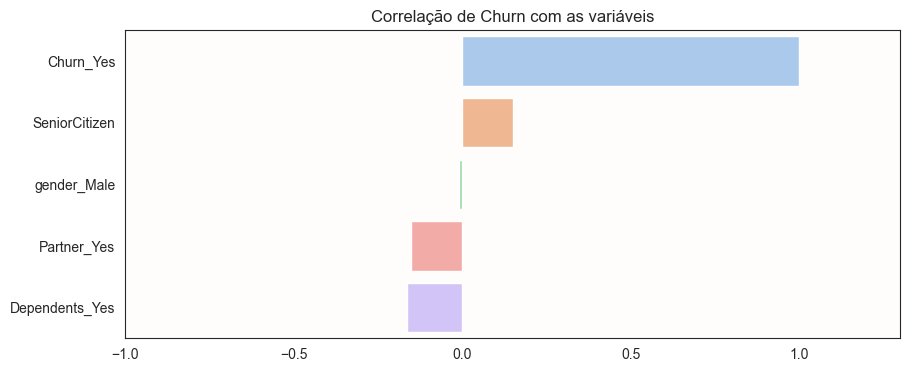

In [623]:
correlation_matrix(demographics_data[['gender', 'Churn', 'Partner', 'Dependents', 'SeniorCitizen']])

Parece não existir correlação do churn com o gênero. Para efeitos de confirmação vamos entender a porcentagem de clientes que abandonaram o serviço em relação ao gênero e ver visualmente o volume.

In [624]:
data_churn_gender = demographics_data.groupby(['gender', 'Churn']).size().unstack().fillna(0)
data_churn_gender['total'] = data_churn_gender.sum(axis=1)
data_churn_gender['churn_ratio'] = data_churn_gender['Yes'] / data_churn_gender['total'] * 100

data_churn_gender['churn_ratio']

gender
Female    26.920872
Male      26.160338
Name: churn_ratio, dtype: float64

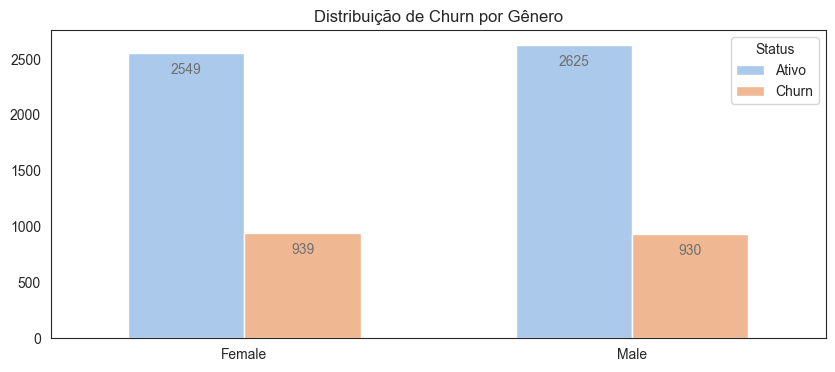

In [625]:

build_plot_category(demographics_data, 'gender', 'Gênero')


Existe alguma relação entre o churn e os outros dados demográficos (Partner, Dependents, SeniorCitizen)?

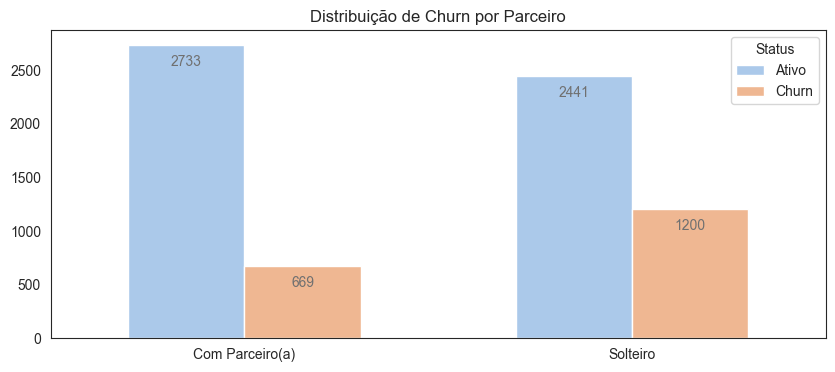

In [626]:
demographics_data['Partner_label'] = demographics_data['Partner'].apply(lambda x: 'Com Parceiro(a)' if x == 'Yes' else 'Solteiro')

build_plot_category(demographics_data, 'Partner_label', 'Parceiro')

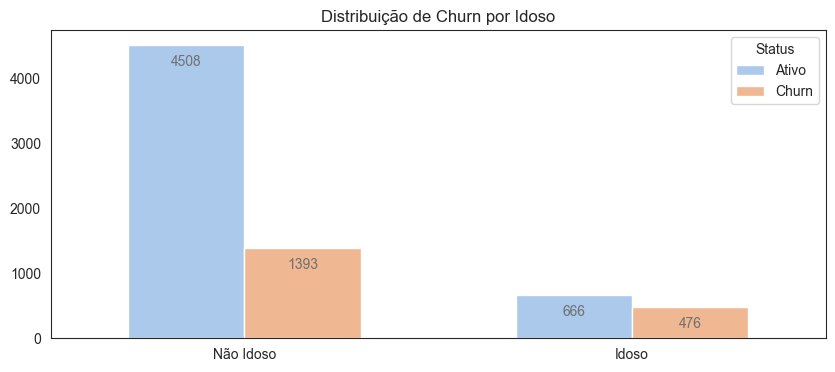

In [627]:
demographics_data['SeniorCitizen_label'] = demographics_data['SeniorCitizen'].apply(lambda x: 'Idoso' if x == 1 else 'Não Idoso')

build_plot_category(demographics_data, 'SeniorCitizen_label', 'Idoso')

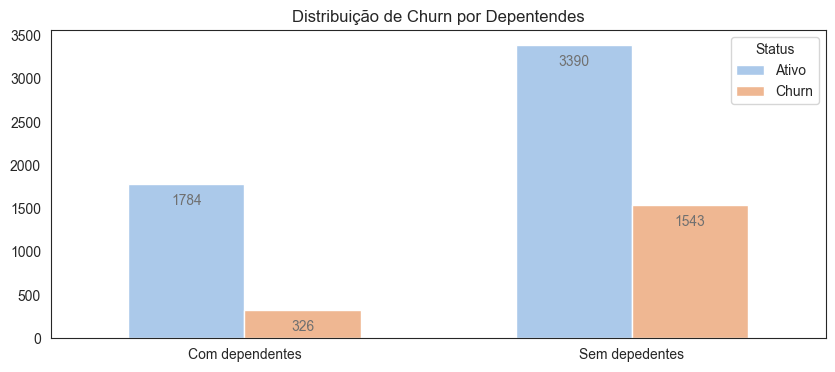

In [628]:
demographics_data['Dependents_label'] = demographics_data['Dependents'].apply(lambda x: 'Com dependentes' if x == 'Yes' else 'Sem depedentes')

build_plot_category(demographics_data, 'Dependents_label', 'Depentendes')

In [629]:
demographics_data = tranform_to_int(demographics_data, ['Partner', 'Dependents', 'Churn'])

demographics_data_grouped = demographics_data.groupby(['Churn_label']).agg({'customerID':'count', 
                                'Partner': 'sum', 
                                 'Dependents': 'sum',
                                 'SeniorCitizen': 'sum',}).reset_index()

demographics_data_grouped['Partner_%'] =   demographics_data_grouped['Partner'] / demographics_data_grouped['customerID'] * 100
demographics_data_grouped['Dependents_%'] = demographics_data_grouped['Dependents'] / demographics_data_grouped['customerID'] * 100
demographics_data_grouped['SeniorCitizen_%'] = demographics_data_grouped['SeniorCitizen'] / demographics_data_grouped['customerID'] * 100

demographics_data_grouped[['Churn_label', 'Partner_%', 'Dependents_%', 'SeniorCitizen_%']]                              

,Churn_label,Partner_%,Dependents_%,SeniorCitizen_%
0,Ativo,52.821801,34.480093,12.872053
1,Churn,35.794543,17.442483,25.468165


In [630]:
print(f"% de Clientes com parceiro(a) na base: {round(demographics_data['Partner'].sum() / demographics_data['customerID'].count() * 100)}%")
print(f"% de Clientes com dependentes na base: {round(demographics_data['Dependents'].sum() / demographics_data['customerID'].count() * 100)}%")
print(f"% de Idosos na base: {round(demographics_data['SeniorCitizen'].sum() / demographics_data['customerID'].count() * 100)}%")

% de Clientes com parceiro(a) na base: 48%
% de Clientes com dependentes na base: 30%
% de Idosos na base: 16%


Principais insights:
- Não existe uma diferença significativa entre os gêneros, a taxa de churn é em torno de 26% para ambos.
- 35% dos clientes que abandonaram o serviço tem parceiros, sendo que eles representam 48% do total de clientes. Menor tendência de churn para esse perfil.
- 17% dos clientes que abandonaram o serviço possuem dependentes, sendo que eles representam 30% do total de clientes. Menor tendência de churn para esse perfil.
- 25% dos clientes que abandonaram o serviço são idosos, sendo que eles representam apenas 16% do total de clientes. Idosos tem uma tendência maior ao churn. 

### Análise de dados de contrato
Nessa etapa vamos analisar os dados de contrato e entender se existe alguma relação com o Churn. São eles:\
- Contract: Tipo de contrato do cliente (Mensal, Anual, Bienal). 
- PaperlessBilling: Indica se o cliente utiliza fatura sem papel (Sim/Não).
- tenure: Tempo em meses que o cliente está com a empresa. 

In [631]:
# Criar uma cópia do dataframe para não alterar o original
contract_data = data_churn.copy()

#### Existe algum padrão de churn em relação a forma como a cobrança é feita?

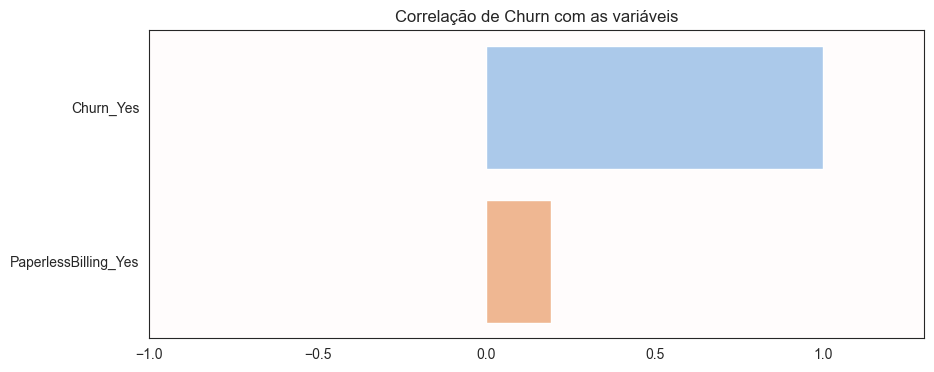

In [632]:
correlation_matrix(contract_data[['Churn', 'PaperlessBilling']])

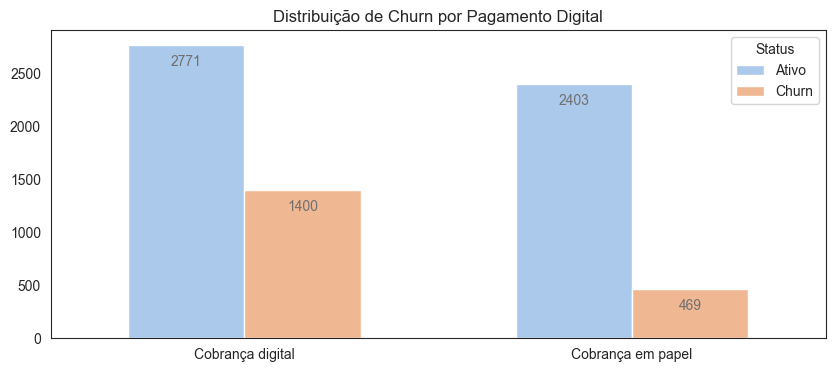

In [633]:
contract_data['PaperlessBilling_label'] = contract_data['PaperlessBilling'].apply(lambda x: 'Cobrança digital' if x == 'Yes' else 'Cobrança em papel')

build_plot_category(contract_data, 'PaperlessBilling_label', 'Pagamento Digital')

In [634]:
paperless_data = tranform_to_int(contract_data, ['PaperlessBilling'])

paperless_data_grouped = paperless_data.groupby('Churn_label').agg({'customerID':'count', 
                                 'PaperlessBilling': 'sum',}).reset_index()

paperless_data_grouped['PaperlessBilling_%'] = paperless_data_grouped['PaperlessBilling'] / paperless_data_grouped['customerID'] * 100

paperless_data_grouped[['Churn_label', 'PaperlessBilling_%']]


,Churn_label,PaperlessBilling_%
0,Ativo,53.556243
1,Churn,74.906367


In [593]:
print(f"% de Clientes com pagamento digital na base: {round(paperless_data['PaperlessBilling'].sum() / paperless_data['customerID'].count() * 100)}%")

% de Clientes com pagamento digital na base: 59%


Key Insights:
- 74% dos clientes que abandonaram o serviço tem o pagamento feito digitalmente, sendo que eles representam 59% do total de clientes. Maior tendência de churn para esse perfil.

#### Será que o tipo de contrato influencia no churn?

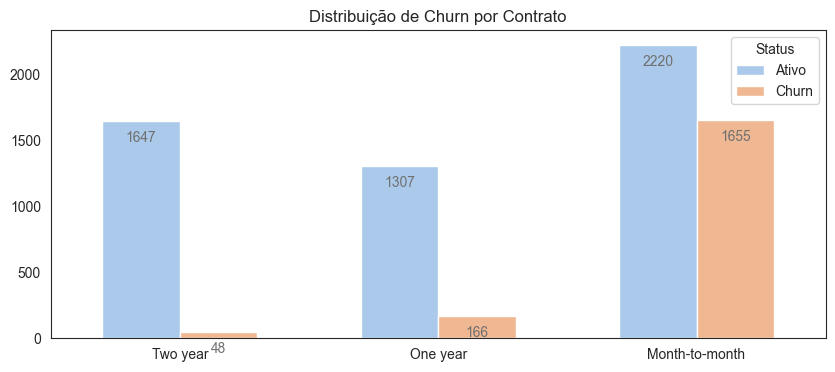

In [594]:
build_plot_category(contract_data, 'Contract', 'Contrato')

In [595]:
contract_data_grouped = contract_data.groupby(['Contract', 'Churn_label']).agg({'customerID':'count'})

contract_data_grouped = contract_data_grouped.pivot_table(values='customerID', index='Contract', columns='Churn_label')

contract_data_grouped['Churn_%'] = contract_data_grouped['Churn'] / (contract_data_grouped['Churn'] + contract_data_grouped['Ativo']) * 100

contract_data_grouped[['Churn_%']]


Churn_label,Churn_%
Contract,
Month-to-month,42.709677
One year,11.269518
Two year,2.831858


In [596]:
print(f"% de Clientes com contrato Month-to-month na base: {round(contract_data[contract_data['Contract'] == 'Month-to-month']['Contract'].count() / contract_data['customerID'].count() * 100)}%")
print(f"% de Clientes com contrato Two year na base: {round(contract_data[contract_data['Contract'] == 'Two year']['Contract'].count() / contract_data['customerID'].count() * 100)}%")
print(f"% de Clientes com contrato One year na base: {round(contract_data[contract_data['Contract'] == 'One year']['Contract'].count() / contract_data['customerID'].count() * 100)}%")

% de Clientes com contrato Month-to-month na base: 55%
% de Clientes com contrato Two year na base: 24%
% de Clientes com contrato One year na base: 21%


Key Insights:
- 42% dos clientes que abandonaram o serviço estão em contratos mensais, sendo que eles representam 55% do total de clientes. Maior tendência de churn para esse perfil.

### Existem algum padrão de churn em relação aos meio de pagamento?

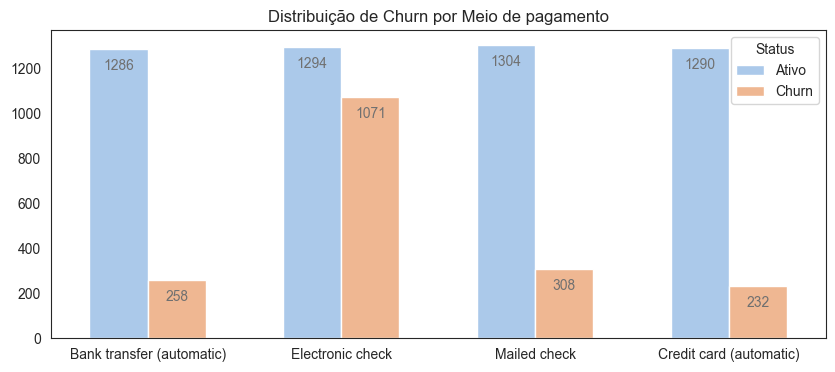

In [597]:
build_plot_category(contract_data, 'PaymentMethod', 'Meio de pagamento')

In [598]:
payment_data = contract_data.groupby(['PaymentMethod', 'Churn_label']).agg({'customerID':'count'})

payment_data = payment_data.pivot_table(values='customerID', index='PaymentMethod', columns='Churn_label')

payment_data['Churn_%'] = payment_data['Churn'] / (payment_data['Churn'] + payment_data['Ativo'])

payment_data[['Churn_%']].sort_values(by='Churn_%', ascending=False)

Churn_label,Churn_%
PaymentMethod,
Electronic check,0.452854
Mailed check,0.191067
Bank transfer (automatic),0.167098
Credit card (automatic),0.152431


In [599]:
print(f"% de Clientes com método de pagamenot Electronic check na base: {round(contract_data[contract_data['PaymentMethod'] == 'Electronic check']['PaymentMethod'].count() / contract_data['customerID'].count() * 100)}%")
print(f"% de Clientes com método de pagamenot Mailed check na base: {round(contract_data[contract_data['PaymentMethod'] == 'Mailed check']['PaymentMethod'].count() / contract_data['customerID'].count() * 100)}%")
print(f"% de Clientes com método de pagamenot Bank transfer (automatic) na base: {round(contract_data[contract_data['PaymentMethod'] == 'Bank transfer (automatic)']['PaymentMethod'].count() / contract_data['customerID'].count() * 100)}%")
print(f"% de Clientes com método de pagamenot Credit card (automatic) na base: {round(contract_data[contract_data['PaymentMethod'] == 'Credit card (automatic)']['PaymentMethod'].count() / contract_data['customerID'].count() * 100)}%")

% de Clientes com método de pagamenot Electronic check na base: 34%
% de Clientes com método de pagamenot Mailed check na base: 23%
% de Clientes com método de pagamenot Bank transfer (automatic) na base: 22%
% de Clientes com método de pagamenot Credit card (automatic) na base: 22%


Key Insights:
- 42% dos clientes que abandonaram o serviço pagam com Eletronic check, sendo que eles representam 34% do total de clientes. Maior tendência de churn para esse perfil.

#### Será que o tempo de contrato influencia no churn?

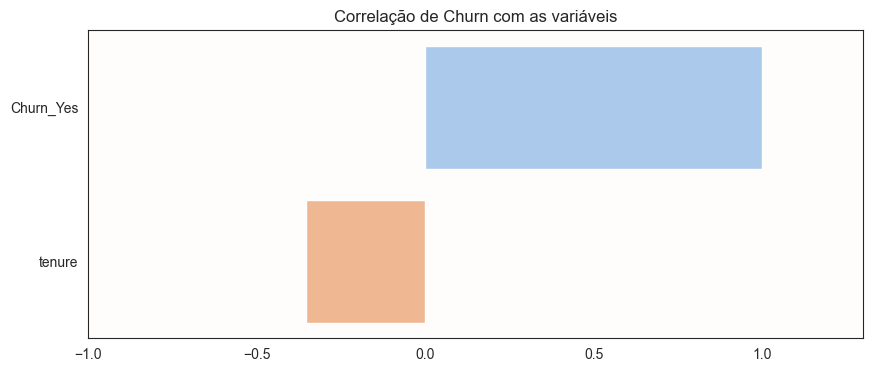

In [635]:
correlation_matrix(contract_data[['tenure', 'Churn']])

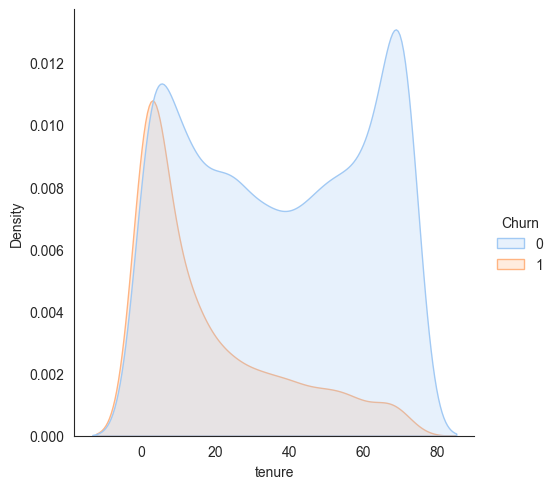

In [600]:
dist_plot_category(contract_data, 'tenure')

Keys Insights:
- Existe uma correlação negativa entre o tempo de contrato e o churn, ou seja, quanto maior o tempo de contrato, menor a tendência de churn.
- O momento de maior tendência de churn é entre 1 e 2 meses de contrato. Após isso a tendência de churn diminui, até que após 40 meses a retenção aumenta.

### Análise de dados financeiros
Nessa etapa vamos analisar os dados financeiros e entender se existe alguma relação com o Churn. São eles:\
- MonthlyCharges: Valor mensal pago pelo cliente.
- TotalCharges: Valor total já pago pelo cliente.

In [636]:
# Criar uma cópia do dataframe para não alterar o original
financial_data = data_churn.copy()

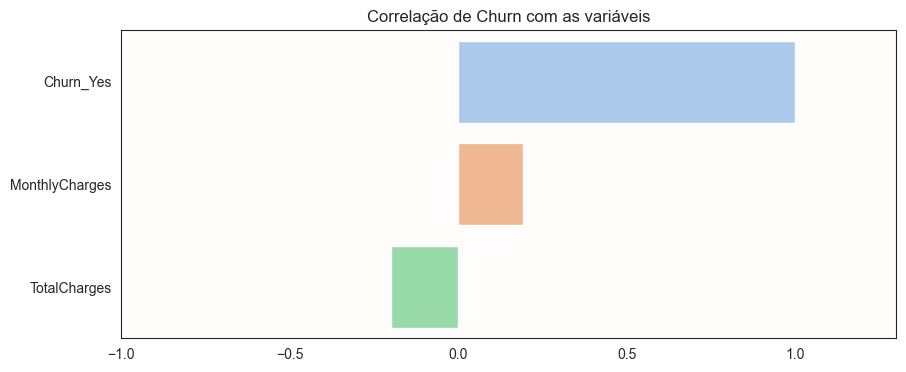

In [637]:
correlation_matrix(financial_data[['MonthlyCharges', 'TotalCharges', 'Churn']])

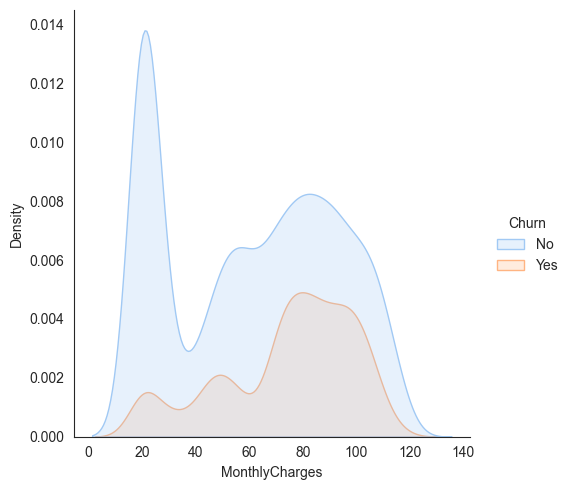

In [639]:
dist_plot_category(financial_data, 'MonthlyCharges')

In [652]:
financial_data.groupby('Churn_label')[['MonthlyCharges']].agg(['mean', 'median', 'max', 'min'])

MonthlyCharges                       
                      mean  median     max    min
Churn_label                                      
Ativo            61.265124  64.425  118.75  18.25
Churn            74.441332  79.650  118.35  18.85

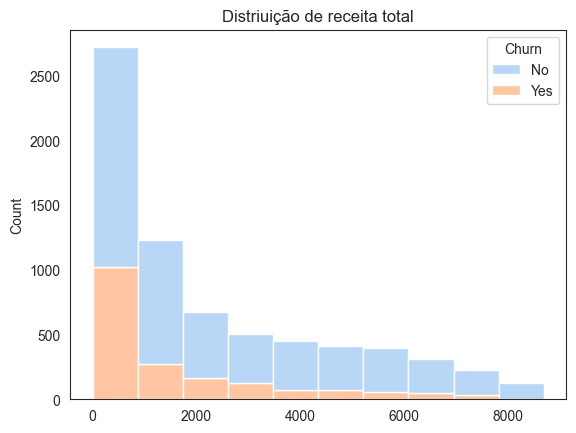

In [724]:
hist_plot_category(financial_data, 'TotalCharges', 'Distriuição de receita total', 10)

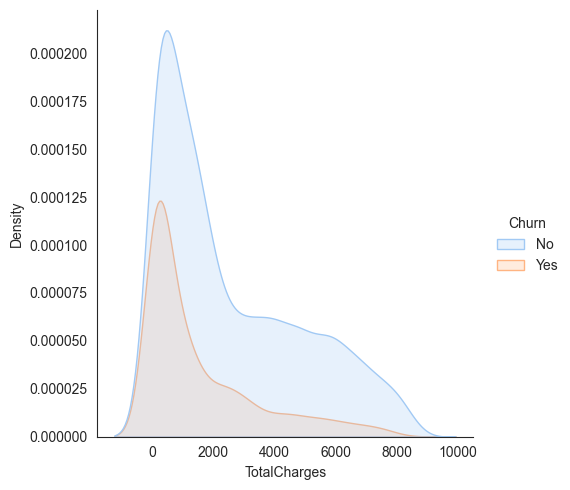

In [640]:
dist_plot_category(financial_data, 'TotalCharges')

In [653]:
financial_data.groupby('Churn_label')[['TotalCharges']].agg(['mean', 'median', 'max', 'min'])

TotalCharges                          
                    mean    median      max    min
Churn_label                                       
Ativo        2549.999497  1679.525  8672.45  18.80
Churn        1531.796094   703.550  8684.80  18.85

Key Insights:
- Em termos de cobrança total, os clientes que abandonaram não diferem muito dos que não abandonaram. 
- Para o pagamento mensal, existe um pico de clientes na casa dos 20-30 dólares para os clientes que não abandonaram. O grupo que paga menos de 20 dólares tem uma tendência menor ao churn.

### Análise de dados de serviços
Nessa etapa vamos analisar os dados de serviços e entender se existe alguma relação com o Churn. São eles:\
- PhoneService: Indica se o cliente possui serviço de telefone (Sim/Não).
- MultipleLines: Indica se o cliente possui várias linhas telefônicas (Não, Sim, Sem serviço de telefone). 
- InternetService: Tipo de serviço de internet do cliente (DSL, Fibra óptica, Sem Internet). 
- OnlineSecurity: Indica se o cliente tem serviço de segurança online (Sim, Não, Sem serviço de Internet).
- OnlineBackup: Indica se o cliente tem serviço de backup online (Sim, Não, Sem serviço de Internet).
- DeviceProtection: Indica se o cliente tem serviço de proteção para dispositivos (Sim, Não, Sem serviço de Internet).
- TechSupport: Indica se o cliente tem suporte técnico (Sim, Não, Sem serviço de Internet).
- StreamingTV: Indica se o cliente tem serviço de streaming de TV (Sim, Não, Sem serviço de Internet).
- StreamingMovies: Indica se o cliente tem serviço de streaming de filmes (Sim, Não, Sem serviço de Internet).

In [666]:
services_data = data_churn.copy()

Para essa análise vou quebrar em duas partes, uma é analisar o serviço de internet e o de telefonia. Depois vou entrar no detalhe de cada um deles.

Existe alguma relação entre o churn e os serviços de internet e de telefonia?

In [669]:
'''
    Para essa primeira análise não quero saber qual serviço de internet o cliente tem, somente se ele tem ou não.
    Por isso, transformo tudo o que não é 'No' em 'Yes' e armazeno em outra coluna.
'''

services_data['InternetService_bool'] = services_data['InternetService'].apply(lambda x: 'No' if x == 'No' else 'Yes')

services_data['InternetService_bool'].value_counts()

InternetService_bool
Yes    5517
No     1526
Name: count, dtype: int64

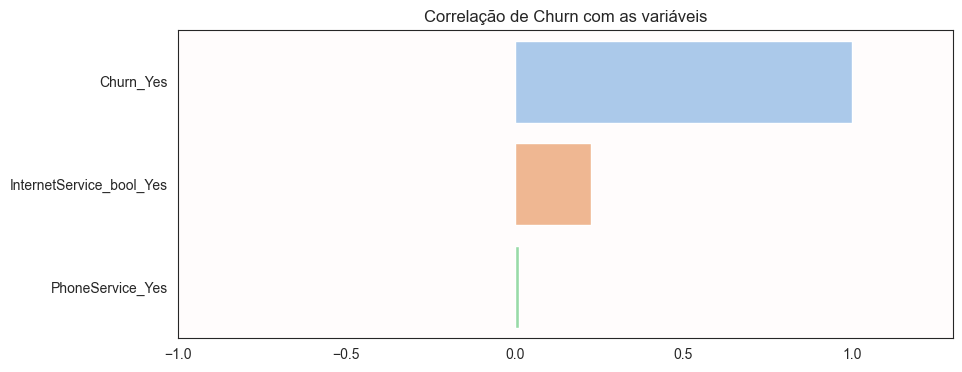

In [670]:
correlation_matrix(services_data[['PhoneService', 
                    'InternetService_bool',
                    'Churn']])

Key insights:
- Para clientes de telefonia não existe uma correlação clara entre os serviços e o churn.
- Já para os clientes de internet existe uma possível correlação entre quem tem o serviço de abandonar.

Algum dos serviços de internet possuem correlação com o Churn?

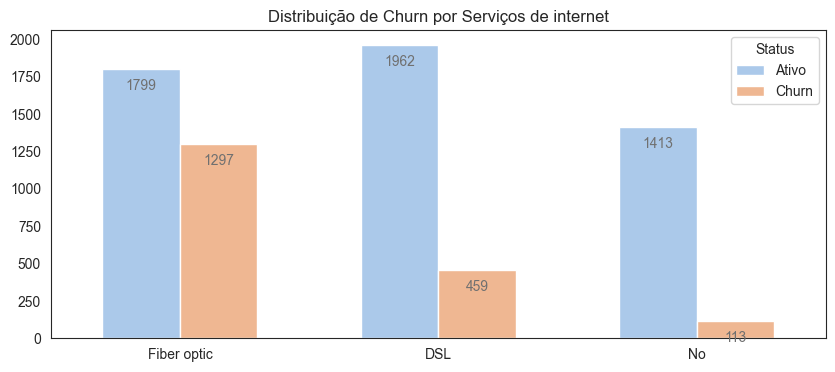

In [671]:
build_plot_category(services_data, 'InternetService', 'Serviços de internet', )

Keu insights:
- Clientes que possuem Fibra óptica tem uma tendência maior ao churn.

Dos clientes de Fibra ótica, quais serviços possuem correlação com o Churn?

In [673]:
customer_fiber_optic = services_data[services_data['InternetService'] == 'Fiber optic']

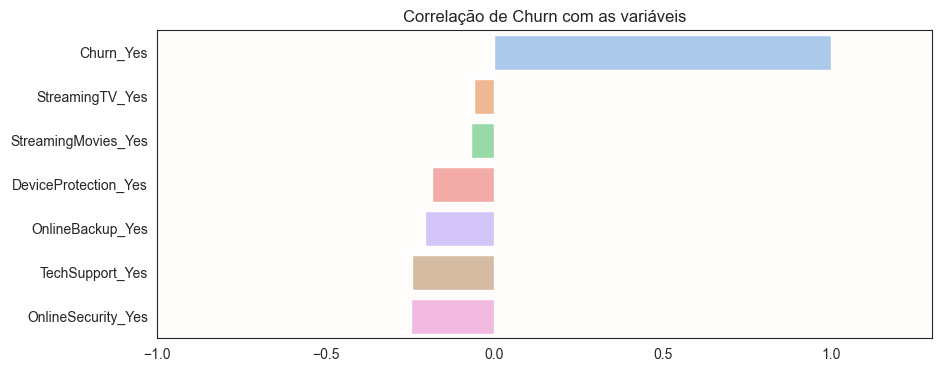

In [674]:
correlation_matrix(customer_fiber_optic[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                            'StreamingTV', 'StreamingMovies',
                                            'Churn']])

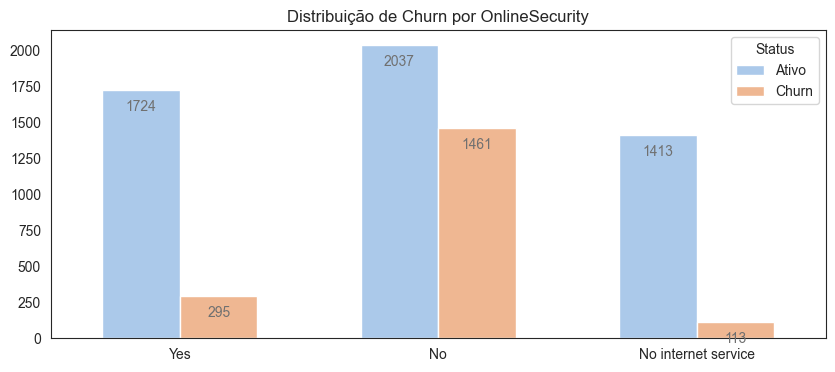

In [676]:
build_plot_category(services_data, 'OnlineSecurity', 'OnlineSecurity')

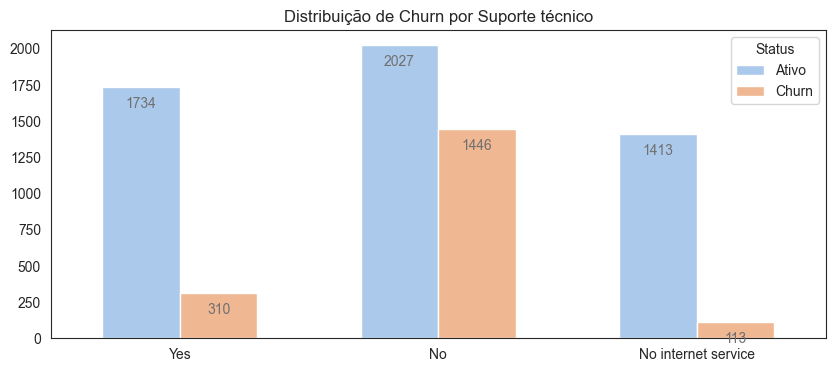

In [679]:
build_plot_category(services_data, 'TechSupport', 'Suporte técnico')

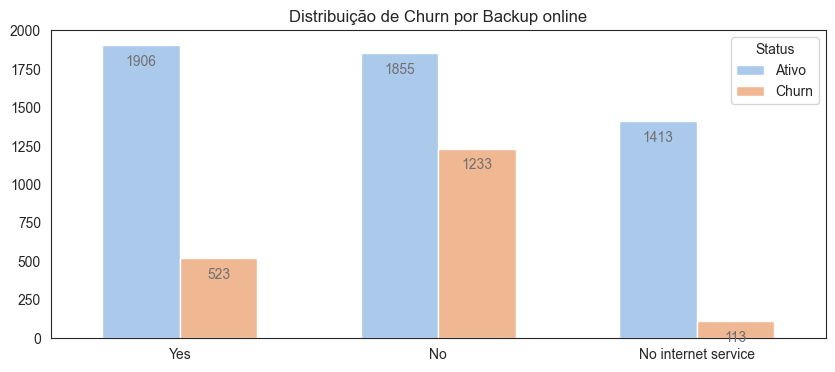

In [680]:
build_plot_category(services_data, 'OnlineBackup', 'Backup online')

Key Insights:
- Dois produtos, OnlineSecurity e TechSupport, possuem uma correlação negativa com o Churn. Ou seja, clientes que possuem esses serviços tem uma tendência menor ao churn. Seguidos por quem tem Backup online

##### Será que quanto mais produtos/ serviços o cliente tem, maior é sua retenção?
Para essa análise vou olhar somente os sub-service de internet e telefonia.

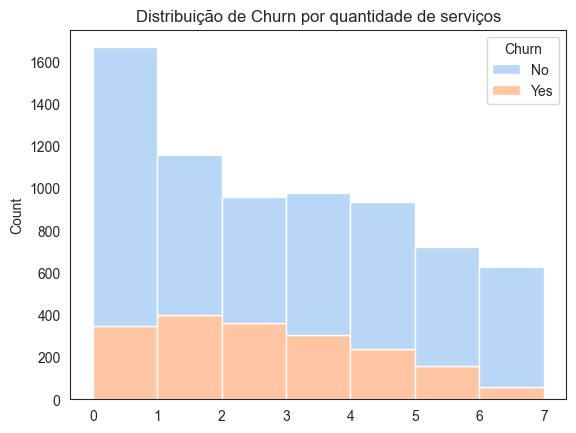

In [721]:
sub_services_data = services_data.copy()

services_cols = ['MultipleLines', 
                    'OnlineSecurity',
                    'OnlineBackup', 
                    'DeviceProtection', 
                    'TechSupport',
                    'StreamingTV', 
                    'StreamingMovies',]

sub_services_data = tranform_to_int(sub_services_data, services_cols )

sub_services_data['total_services'] = sub_services_data[services_cols].sum(axis=1)

hist_plot_category(sub_services_data, 'total_services', 'Distribuição de Churn por quantidade de serviços', bins=7)

Key Insights:
- A hipótese de que quanto mais produtos o cliente tem, menor é a tendência de churn não é verdadeira.

### Conclusões

Dadas as análises identificamos que os principais fatores que influenciam o Churn são:
- Tipo de contrato: Contratos mensais tem uma tendência maior ao Churn.
- Forma de pagamento: Pagamento eletrônico tem uma tendência maior ao Churn.
- Tempo de contrato: Clientes que estão a menos de 2 meses tem uma tendência maior ao Churn.
- Serviço de internet: Clientes que possuem Fibra óptica tem uma tendência maior ao Churn.
- Serviços de segurança e suporte técnico: Clientes que possuem esses serviços tem uma tendência menor ao Churn.
- Pagamento mensal: Clientes que pagam menos de 20 dólares tem uma tendência menor ao Churn.